
**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [240]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.16.5
pandas version :  0.25.1
seaborn version :  0.9.0


In [241]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [242]:
df = pd.read_csv('Product_Exclusive_Classification.csv')
df.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


## Describe Data

In [243]:
df.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,1.910231e+06,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
id                   8000 non-null int64
brand                8000 non-null object
category             7987 non-null object
rating               7905 non-null float64
number_of_reviews    7991 non-null float64
love                 7966 non-null float64
price                7992 non-null float64
value_price          7983 non-null float64
exclusive            8000 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [245]:
nums= df.select_dtypes(include=[np.number])
cats = df.select_dtypes(exclude=[np.number])

In [246]:
nums

,id,rating,number_of_reviews,love,price,value_price,exclusive
0,50,5.0,46.0,0.0,50.0,50.0,0
1,304,0.0,0.0,0.0,50.0,50.0,0
2,404,0.0,0.0,0.0,50.0,50.0,0
3,443,0.0,0.0,0.0,50.0,50.0,0
4,463,0.0,0.0,0.0,50.0,50.0,0
...,...,...,...,...,...,...,...
7995,2293207,0.0,0.0,194.0,85.0,85.0,0
7996,2293439,4.0,30.0,12400.0,55.0,55.0,0
7997,2293488,4.5,22.0,12900.0,29.0,34.0,1
7998,2293793,4.5,5.0,2400.0,12.0,12.0,0


## Missing Value (5 Poin)

In [247]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [248]:
df_clean = df.copy()

In [249]:
df_clean.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [250]:
df_clean = df_clean.fillna(df_clean.mean())

In [251]:
df_clean.isna().sum()

id                    0
brand                 0
category             13
rating                0
number_of_reviews     0
love                  0
price                 0
value_price           0
exclusive             0
dtype: int64

In [252]:
df_clean.groupby('category').count().reset_index()

,category,id,brand,rating,number_of_reviews,love,price,value_price,exclusive
0,Accessories,1,1,1,1,1,1,1,1
1,After Sun Care,2,2,2,2,2,2,2,2
2,Aftershave,13,13,13,13,13,13,13,13
3,Anti-Aging,36,36,36,36,36,36,36,36
4,BB & CC Cream,18,18,18,18,18,18,18,18
...,...,...,...,...,...,...,...,...,...
137,Tinted Moisturizer,14,14,14,14,14,14,14,14
138,Toners,82,82,82,82,82,82,82,82
139,Tweezers & Eyebrow Tools,12,12,12,12,12,12,12,12
140,Value & Gift Sets,241,241,241,241,241,241,241,241


In [253]:
df_clean['category'].describe()

count        7987
unique        142
top       Perfume
freq          619
Name: category, dtype: object

In [254]:
df_clean['category'].fillna(df_clean['category'].mode()[0], inplace=True)

In [255]:
df_clean.isna().sum()

id                   0
brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64

## Duplicate Values (5 Poin)

> Pemblokiran indentasi



In [256]:
df_clean.duplicated().sum()

0

## Outliers (5 Poin)

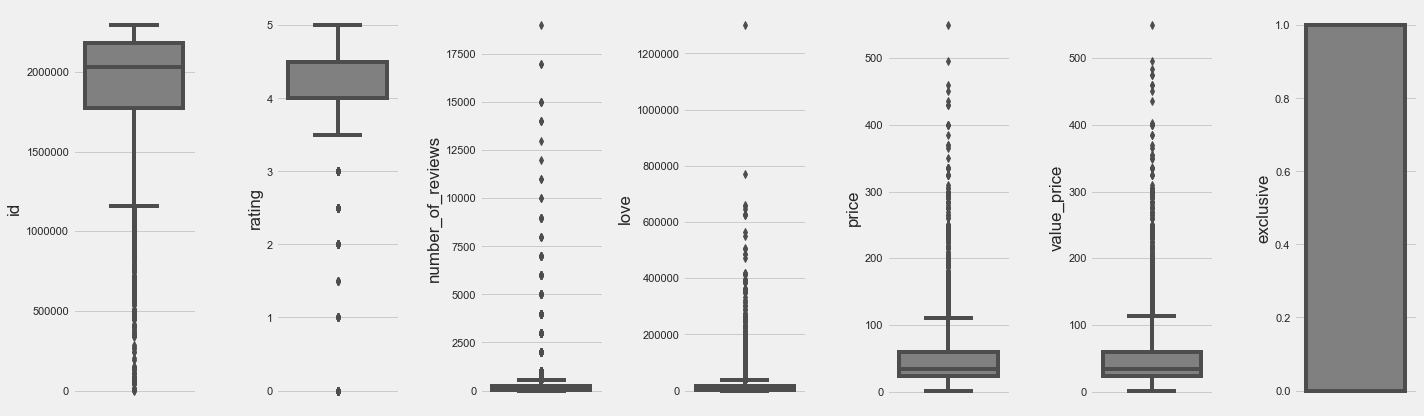

In [257]:
plt.figure(figsize=(20, 6))
for i in range(0, len(nums.columns)):
    plt.subplot(1, len(nums.columns), i+1)
    sns.boxplot(y=df_clean[nums.columns[i]], color='gray', orient='v')
    plt.tight_layout()

Untuk boxplot, keberadaan outlier.
* Outlier terlihat utamanya pada kolom `Rating`, `Number_of_reviews`, `Love`, `Price` dan `value_price`
* Dari boxplotnya terlihat mana distribusi yang terlihat agak *skewed*: `Id`, `Rating`, `Number_of_reviews`, `Love`, `Price` dan `value_price`

In [258]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_clean)}')

filtered_entries = np.array([True] * len(df_clean))

for col in ['rating', 'number_of_reviews', 'love', 'price', 'value_price']:
    zscore = abs(stats.zscore(df_clean[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_clean = df_clean[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')

Jumlah baris sebelum memfilter outlier: 8000
Jumlah baris setelah memfilter outlier: 7475


## Normalization/Standardization (5 Poin)


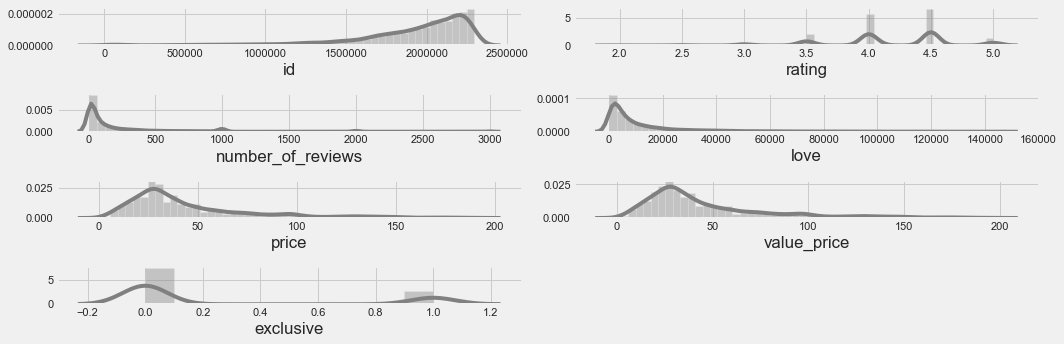

In [259]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums.columns)):
    plt.subplot(4, len(nums.columns)/3, i+1)
    sns.distplot(df_clean[nums.columns[i]], color='gray')
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Seperti dugaan kita ketika melihat boxplot di atas, kolom `Id`, `Rating`, `Number_of_reviews`, `Love`, `Price` dan `value_price` *skewed*
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya
* Selain kolom2 itu distribusinya terlihat normal-normal saja hanya `èxclusive`

In [260]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [261]:
for i in range(0, len(nums.columns) ):
        df_clean[nums.columns[i]] = MinMaxScaler().fit_transform(df_clean[nums.columns[i]].values.reshape(len(df_clean), 1))

In [262]:
df_clean.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000,7475.000000
mean,0.831745,0.720327,0.072367,0.091485,0.228909,0.226254,0.259799
std,0.168138,0.168869,0.132778,0.139345,0.174223,0.173512,0.438554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.771722,0.666667,0.005002,0.014276,0.117021,0.113402,0.000000
50%,0.884361,0.666667,0.019006,0.038069,0.170213,0.170103,0.000000
75%,0.951924,0.833333,0.074358,0.102991,0.287234,0.288660,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature encoding (5 Poin)

In [263]:
cats['brand'].sample(5)

5441     ALTERNA Haircare
6579              Olaplex
5348             CLINIQUE
2580                belif
7549    Dr. Barbara Sturm
Name: brand, dtype: object

In [264]:
cats.describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


In [265]:
df_clean['brand'].astype('category').cat.categories

Index(['8Greens', 'AERIN', 'ALTERNA Haircare', 'AMOREPACIFIC',
       'Acqua Di Parma', 'Aether Beauty', 'Algenist', 'Alpha-H',
       'Anastasia Beverly Hills', 'Anthony',
       ...
       'lilah b.', 'lululemon selfcare', 'philosophy', 'rag & bone',
       'rms beauty', 'shu uemura', 'stila', 'surratt beauty', 'tarte',
       'trèStiQue'],
      dtype='object', length=308)

In [266]:

df_clean['category_label'] = df_clean['category'].astype('category').cat.codes
df_clean['brand_label'] = df_clean['brand'].astype('category').cat.codes
df_clean


,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive,category_label,brand_label
0,0.000000,SEPHORA COLLECTION,no category,1.000000,0.015005,0.000000,0.255319,0.247423,0.0,141,224
5,0.002824,Givenchy,Perfume,0.833333,0.031010,0.020394,0.404255,0.391753,0.0,119,99
6,0.003201,BVLGARI,Cologne,1.000000,0.010003,0.022434,0.489362,0.474227,0.0,28,20
7,0.003353,Yves Saint Laurent,Perfume,0.833333,0.054351,0.028552,0.319149,0.309278,0.0,119,286
8,0.004784,Carolina Herrera,Perfume,0.833333,0.042014,0.019714,0.446809,0.432990,0.0,119,41
...,...,...,...,...,...,...,...,...,...,...,...
7993,0.999733,VOLUSPA,Candles & Home Scents,0.666667,0.004335,0.021754,0.085106,0.082474,0.0,24,269
7994,0.999741,VOLUSPA,Candles,1.000000,0.000000,0.000625,0.441489,0.427835,0.0,23,269
7996,0.999846,TOM FORD,Lipstick,0.666667,0.009670,0.084296,0.281915,0.273196,0.0,103,252
7997,0.999867,FENTY BEAUTY by Rihanna,Lip Sets,0.833333,0.007002,0.087695,0.143617,0.164948,1.0,99,88


In [267]:
del df_clean['category']
del df_clean['brand']

In [268]:
df_clean.columns

Index(['id', 'rating', 'number_of_reviews', 'love', 'price', 'value_price',
       'exclusive', 'category_label', 'brand_label'],
      dtype='object')

In [269]:
df_clean.sample(5)

,id,rating,number_of_reviews,love,price,value_price,exclusive,category_label,brand_label
3955,0.883702,0.666667,0.333111,0.147519,0.180851,0.175258,0.0,57,162
1932,0.765769,0.695045,0.043681,0.038069,0.127660,0.123711,0.0,82,75
7820,0.995774,0.666667,0.001667,0.004487,0.281915,0.273196,0.0,103,136
6796,0.969988,0.833333,0.228743,0.239973,0.228723,0.221649,1.0,109,67
5976,0.952103,0.166667,0.001334,0.008158,0.335106,0.324742,0.0,9,175


In [270]:
df_clean.shape

(7475, 9)

## Class imbalance (5 Poin)

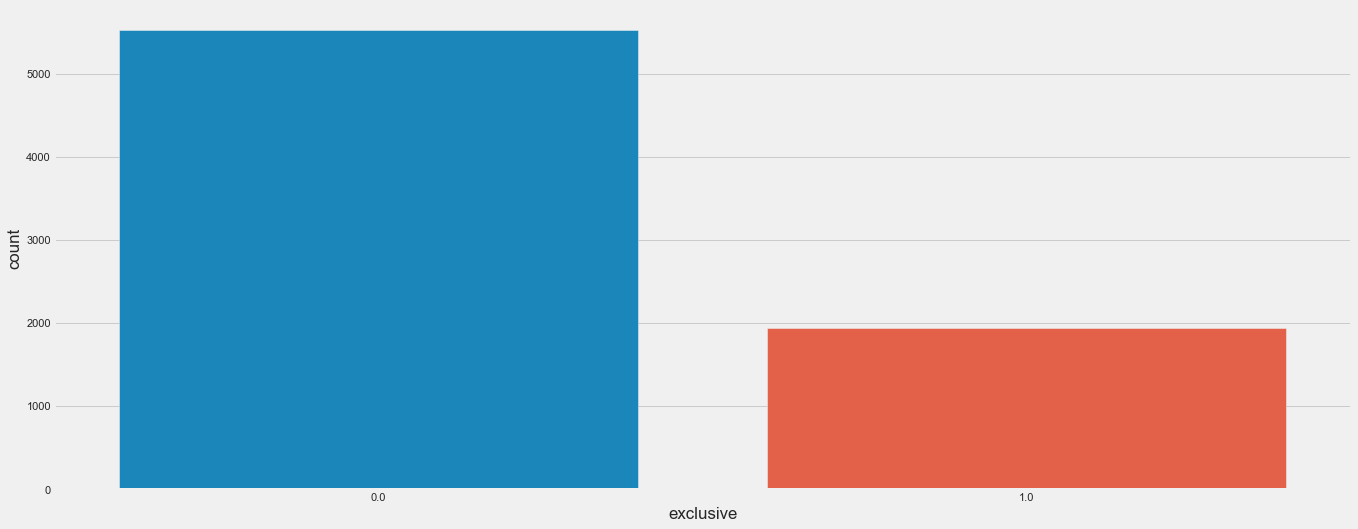

In [271]:
sns.countplot(df_clean['exclusive'])

In [272]:
df_clean['exclusive'].value_counts()

0.0    5533
1.0    1942
Name: exclusive, dtype: int64

In [273]:
X = df_clean[[col for col in df_clean.columns if (str(df_clean[col].dtype) != 'object') and col not in ['exclusive']]]
y = df_clean['exclusive'].values
print(X.shape)
print(y.shape)

(7475, 8)
(7475,)


In [274]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [275]:
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
0.0    5533
1.0    2766
dtype: int64


# Exploratory Data Analysis (EDA)

## Pendekatan Numerik (10 Poin)

In [296]:
df.info()
df['id'] = df['id'].astype('str')
cats = ['brand', 'category']
nums = ['rating', 'number_of_reviews', 'love', 'price', 'value_price']
df.sample(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
id                   8000 non-null object
brand                8000 non-null object
category             7987 non-null object
rating               7905 non-null float64
number_of_reviews    7991 non-null float64
love                 7966 non-null float64
price                7992 non-null float64
value_price          7983 non-null float64
exclusive            8000 non-null int64
dtypes: float64(5), int64(1), object(3)
memory usage: 562.6+ KB


,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
3734,1998087,La Mer,Setting Spray & Powder,4.0,36.0,7900.0,95.0,95.0,0
7397,2262350,Primera,Face Wash & Cleansers,3.5,5.0,686.0,25.0,25.0,1
4758,2083814,Jack Black,Body Wash & Shower Gel,5.0,8.0,824.0,15.0,15.0,0
2671,1873207,Moroccanoil,Body Sunscreen,5.0,16.0,2500.0,32.0,32.0,0
7490,2267078,Viseart,Eye Palettes,4.5,21.0,12100.0,39.0,39.0,0
1271,1626969,tarte,Concealer,4.5,608.0,24700.0,25.0,25.0,0
384,1129766,TOM FORD,Perfume,4.0,200.0,4900.0,128.0,128.0,0
1810,1736131,SEPHORA COLLECTION,Brush Cleaners,4.5,190.0,15200.0,8.0,8.0,1
3839,2011039,rag & bone,Perfume,3.5,4.0,564.0,150.0,150.0,1
7031,2240729,Origins,Moisturizers,4.5,1000.0,9600.0,34.0,34.0,0


In [279]:
df[cats].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom brand:
SEPHORA COLLECTION     492
CLINIQUE               211
TOM FORD               150
tarte                  143
Kiehl's Since 1851     122
                      ... 
Cellu-cup                1
Google                   1
Too Cool For School      1
DL.MD                    1
TokyoMilk                1
Name: brand, Length: 310, dtype: int64

Value count kolom category:
Perfume                      619
Moisturizers                 395
Face Serums                  334
Value & Gift Sets            241
Face Wash & Cleansers        225
                            ... 
Cleansing Brushes              1
Hair Styling & Treatments      1
Curls & Coils                  1
Accessories                    1
Powder Brush                   1
Name: category, Length: 142, dtype: int64



## Pendekatan Grafis

### Univariate Analysis (20 Poin)

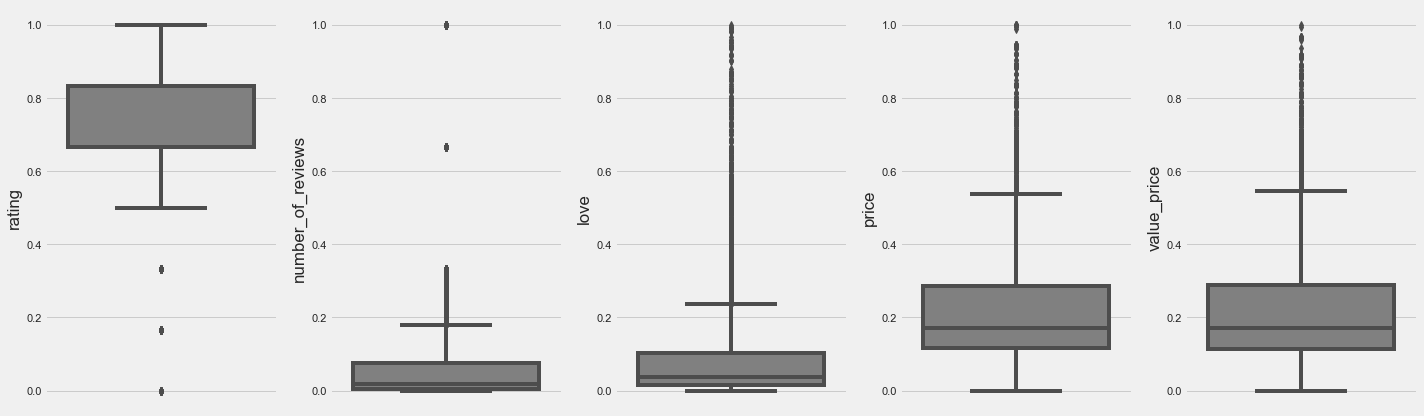

In [283]:
plt.figure(figsize=(20, 6))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_clean[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Untuk boxplot, keberadaan outlier setelah mengapus outlier .
* Outlier masih terlihat utamanya pada kolom `Rating`, `Number_of_reviews`, `Love`, `Price` dan `value_price` namun sudah dinormalization

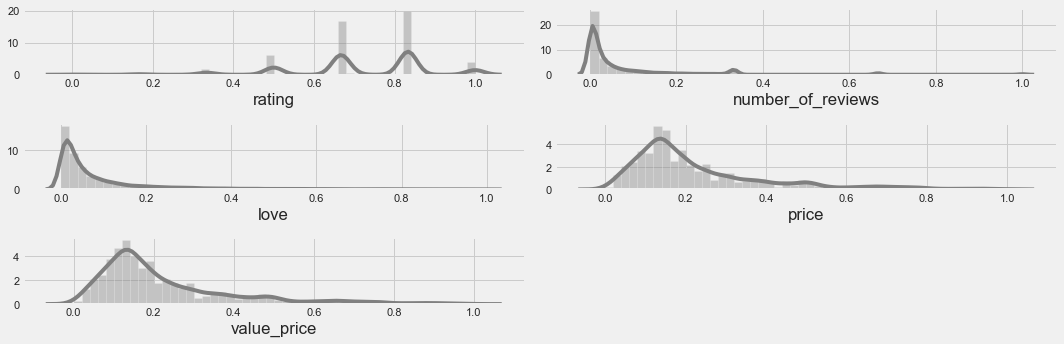

In [288]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.distplot(df_clean[nums[i]], color='gray')
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Seperti dugaan kita ketika melihat boxplot di atas, kolom `Id`, `Rating`, `Number_of_reviews`, `Love`, `Price` dan `value_price` *skewed*
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya
* Selain kolom2 itu distribusinya terlihat normal-normal saja hanya `èxclusive`

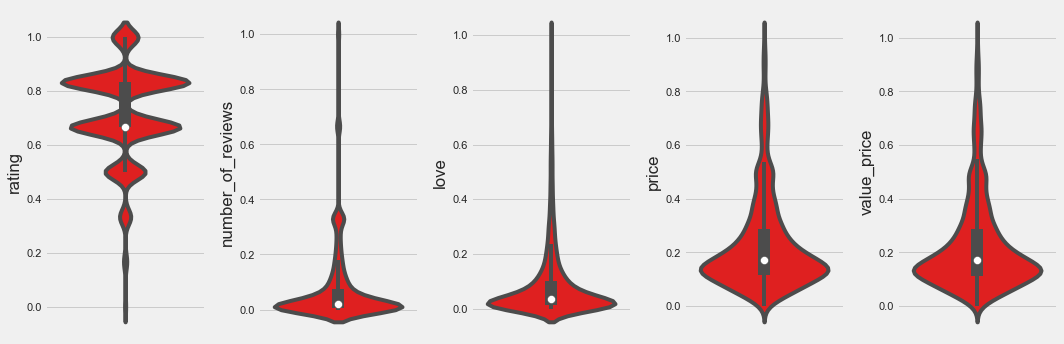

In [294]:


plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    
    sns.violinplot(y=df_clean[nums[i]], color='red', orient='v')
    plt.tight_layout()

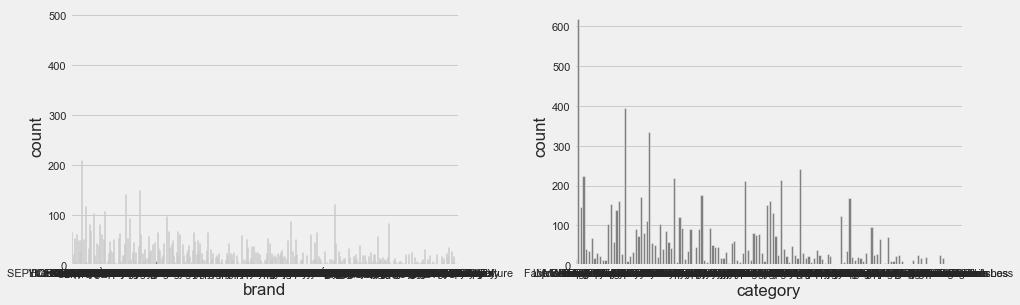

In [298]:
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[i]], color='gray', orient='h')
    plt.tight_layout()

Terdapat banyak brand dan category yang kemungkinan tidak akan dipakai semua, sebaiknya bisa diencode agar lebih terbaca. Terdapat sau brand dan category yang lumayan tinggi jumlahnya dibandingkan dengan yang lain

### Multivariate Analysis (10 Poin)

<Figure size 1080x1080 with 0 Axes>

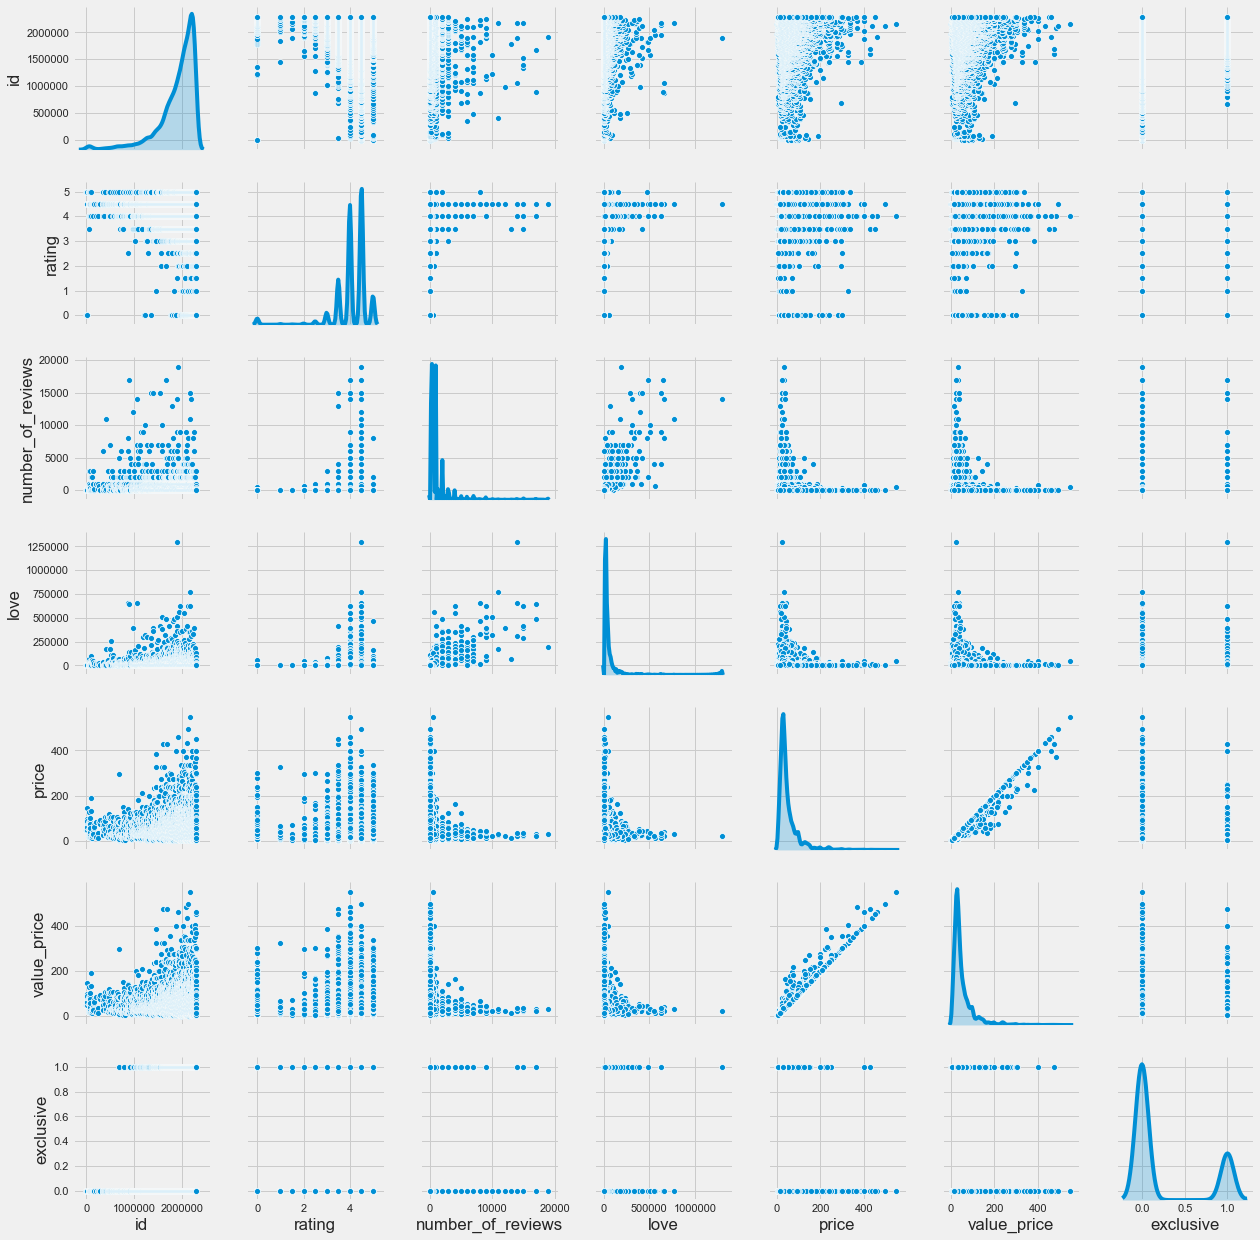

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

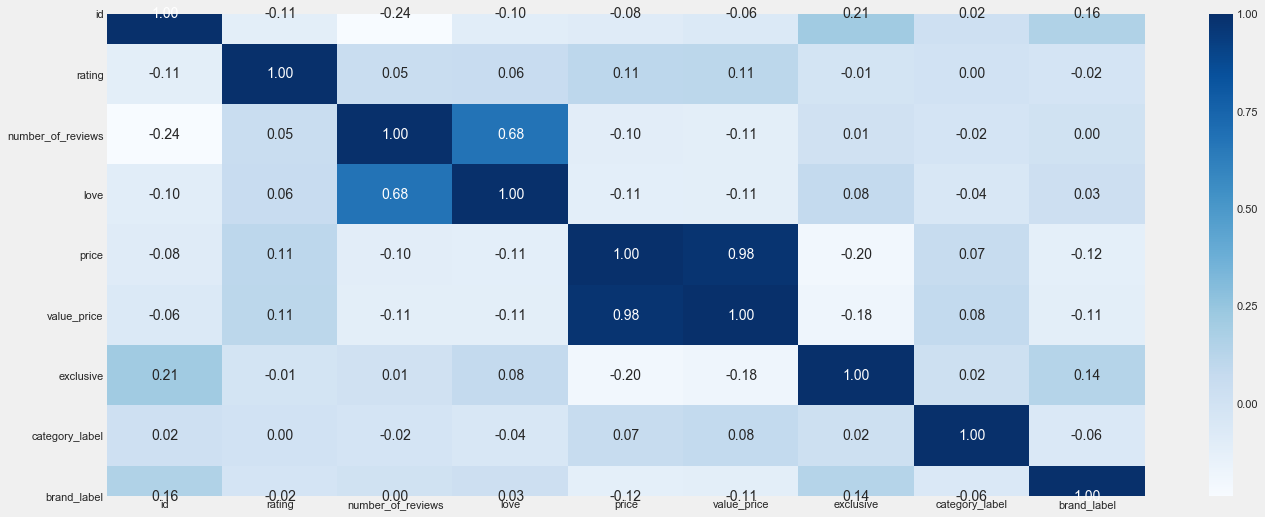

In [305]:
sns.heatmap(df_clean.corr(), cmap = 'Blues', annot = True , fmt ='.2f')


## Insight (20 Poin)

Apa saja insight yang kamu temukan dari hasil-hasil analisis di atas?

# Data Preparation

Menurut kami, ada 3 tahapan re-processing yang paling memberikan impact untuk dataset yang telah diberikan, yaitu :

* Handling missing value, missing value merupakan data yang tidak akurat dikarenakan informasi yang hilang (missing) menyebabkan informasi yang ada di dalamnya tidak relevan untuk dilakukan proses pengolahan data selanjutnya yang dikhawatirkan akan mempengaruhi insight. Dalam kasus ini, kami melakukan handling missing value dengan mengisi data data yang hilang menggunakan mean untuk numerical dan modus untuk categorical, hal ini dilakukan untuk mencegah terhapusnya data data yang kemungkinan bersifat krusial. Dalam dataset ini, kami melakukan handling value terhadap 176 missing data.

* Handling outliers, Outlier merupakan data yang nilainya terlalu jauh jika dibandingkan dengan data lainnya, keterdapatan outlier ini akan membuat analisis terhadap data tersebut menjadi bias atau dengan kata lain tidak mencerminkan keadaan yang sebenarnya sehingga akan mempengaruhi insight yang akan dihasilkan. Setelah melakukan visualisasi data menggunakan boxplot, outlier terlihat pada kolom Rating, Number_of_reviews, Love, Price dan value_price . Sehingga dilakukan handling outliers pada kolom kolom tersebut menggunakan metode z score. Setelah melakukan proses filter outliers diketahui jumlah baris sebelum memfilter outlier yaitu 7828 dan jumlah baris setelah memfilter outlier yaitu 7311 sehingga jumlah baris berkurang sebanyak 517.